# 205 Run FaIR REN

In this notebook, we run FaIR on the REN scenario. This will be helpful to calculate TCREdown.

In [1]:
import os
import json
import copy
import pyam
import pandas as pd

from climate_assessment.climate.fair import get_fair_configurations
from climate_assessment.climate import clean_wg3_scenarios

from scmdata import ScmRun
from openscm_runner.run import run
from openscm_runner.adapters import FAIR

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

/Users/gauravganti/opt/anaconda3/envs/provide_perspective/lib/python3.10/site-packages/scmdata/database/_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


Step 1: Load the emissions data file.

In [2]:
df_emissions = pd.read_csv(
    os.path.join(
        'processed_data',
        '203_ren_emissions.csv'
    )
)

Step 2: Rename the variable column to pass through the cleaning function.

In [3]:
df_emissions['Variable'] = (
    df_emissions['Variable']
    .apply(
        lambda x: x.replace(
            'Emissions', 
            'Infilled|Emissions'
        )
    )
)

Step 3: Run through the cleaning function

In [4]:
df_to_crunch_new = clean_wg3_scenarios(
    pyam.IamDataFrame(
        df_emissions    
    )
)

/Users/gauravganti/opt/anaconda3/envs/provide_perspective/lib/python3.10/site-packages/climate_assessment/climate/wg3.py:42: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean["variable"] = df_clean["variable"].str.replace(old, new)


Step 4: Renmae the variable

In [5]:
df_to_crunch_new['variable'] = df_to_crunch_new['variable'].apply(
    lambda x: x.replace('Infilled|Emissions', 'Emissions')
)

In [6]:
df_to_crunch_new.variable.unique()

array(['Emissions|BC', 'Emissions|C2F6', 'Emissions|C6F14',
       'Emissions|CF4', 'Emissions|CH4', 'Emissions|CO',
       'Emissions|CO2|MAGICC AFOLU',
       'Emissions|CO2|MAGICC Fossil and Industrial', 'Emissions|HFC125',
       'Emissions|HFC134a', 'Emissions|HFC143a', 'Emissions|HFC227ea',
       'Emissions|HFC23', 'Emissions|HFC245fa', 'Emissions|HFC32',
       'Emissions|HFC4310mee', 'Emissions|N2O', 'Emissions|NH3',
       'Emissions|NOx', 'Emissions|OC', 'Emissions|SF6',
       'Emissions|Sulfur', 'Emissions|VOC'], dtype=object)

In [7]:
df_to_crunch_new[df_to_crunch_new.variable=='Emissions|CO2']

Empty DataFrame
Columns: [model, region, scenario, unit, variable, 2015-01-01 00:00:00, 2016-01-01 00:00:00, 2017-01-01 00:00:00, 2018-01-01 00:00:00, 2019-01-01 00:00:00, 2020-01-01 00:00:00, 2021-01-01 00:00:00, 2022-01-01 00:00:00, 2023-01-01 00:00:00, 2024-01-01 00:00:00, 2025-01-01 00:00:00, 2026-01-01 00:00:00, 2027-01-01 00:00:00, 2028-01-01 00:00:00, 2029-01-01 00:00:00, 2030-01-01 00:00:00, 2031-01-01 00:00:00, 2032-01-01 00:00:00, 2033-01-01 00:00:00, 2034-01-01 00:00:00, 2035-01-01 00:00:00, 2036-01-01 00:00:00, 2037-01-01 00:00:00, 2038-01-01 00:00:00, 2039-01-01 00:00:00, 2040-01-01 00:00:00, 2041-01-01 00:00:00, 2042-01-01 00:00:00, 2043-01-01 00:00:00, 2044-01-01 00:00:00, 2045-01-01 00:00:00, 2046-01-01 00:00:00, 2047-01-01 00:00:00, 2048-01-01 00:00:00, 2049-01-01 00:00:00, 2050-01-01 00:00:00, 2051-01-01 00:00:00, 2052-01-01 00:00:00, 2053-01-01 00:00:00, 2054-01-01 00:00:00, 2055-01-01 00:00:00, 2056-01-01 00:00:00, 2057-01-01 00:00:00, 2058-01-01 00:00:00, 2059-01-01 00:00:00, 2060-01-01 00:00:00, 2061-01-01 00:00:00, 2062-01-01 00:00:00, 2063-01-01 00:00:00, 2064-01-01 00:00:00, 2065-01-01 00:00:00, 2066-01-01 00:00:00, 2067-01-01 00:00:00, 2068-01-01 00:00:00, 2069-01-01 00:00:00, 2070-01-01 00:00:00, 2071-01-01 00:00:00, 2072-01-01 00:00:00, 2073-01-01 00:00:00, 2074-01-01 00:00:00, 2075-01-01 00:00:00, 2076-01-01 00:00:00, 2077-01-01 00:00:00, 2078-01-01 00:00:00, 2079-01-01 00:00:00, 2080-01-01 00:00:00, 2081-01-01 00:00:00, 2082-01-01 00:00:00, 2083-01-01 00:00:00, 2084-01-01 00:00:00, 2085-01-01 00:00:00, 2086-01-01 00:00:00, 2087-01-01 00:00:00, 2088-01-01 00:00:00, 2089-01-01 00:00:00, 2090-01-01 00:00:00, 2091-01-01 00:00:00, 2092-01-01 00:00:00, 2093-01-01 00:00:00, 2094-01-01 00:00:00, 2095-01-01 00:00:00, 2096-01-01 00:00:00, 2097-01-01 00:00:00, 2098-01-01 00:00:00, 2099-01-01 00:00:00, 2100-01-01 00:00:00, 2110-01-01 00:00:00]
Index: []

[0 rows x 92 columns]

In [8]:
df_final = ScmRun(df_to_crunch_new)

Step 2: Load the FaIR configurations.

In [9]:
data_dir = os.path.join('processed_data', 'fair')
fair_slim_filename = 'fair-1.6.2-wg3-params-slim.json'
fair_common_filename = 'fair-1.6.2-wg3-params-common.json'

In [10]:
fair_config = get_fair_configurations(
    fair_version='1.6.2',
    fair_probabilistic_file=os.path.join(data_dir, fair_slim_filename),
    fair_extra_config=os.path.join(data_dir, fair_common_filename),
    num_cfgs=2237
)

Step 3: Trim length of config.

In [11]:
nt = df_final.time_points.years()[-1] - 1750 + 1
nt

361

In [12]:
updated_config = copy.copy(fair_config)
for i in range(len(fair_config)):
    updated_config[i]['F_solar'] = updated_config[i]['F_solar'][:nt]
    updated_config[i]['F_volcanic'] = updated_config[i]['F_volcanic'][:nt]
    updated_config[i]['natural'] = updated_config[i]['natural'][:nt]

Step 4: Run FaIR

In [13]:
temp = run(
    climate_models_cfgs={
        'FAIR':updated_config
    },
    scenarios=df_final,
    output_variables=(
        "Surface Air Temperature Change",
    ),
)

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Creating FaIR emissions inputs:   0%|          | 0.00/5.00 [00:00<?, ?it/s]

/Users/gauravganti/opt/anaconda3/envs/provide_perspective/lib/python3.10/site-packages/openscm_units/_unit_registry.py:471: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, val in metric_conversion.iteritems():


Front serial:   0%|          | 0.00/3.00 [00:00<?, ?it/s]

Front parallel:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

Parallel runs:   0%|          | 0.00/11.2k [00:00<?, ?it/s]

Step 5: Rebase the output

In [14]:
temp_rebased = (
    temp
    .relative_to_ref_period_mean(
        year=range(
            1850,
            1901
        )
    )
)

Step 6: Cast this to a pyam dataframe and swap the time dimension to years.

In [15]:
temp_ts = (
    temp_rebased
    .to_iamdataframe()
    .swap_time_for_year()
    .timeseries()
)

In [16]:
temp_ts

1750  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year run_id             
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        0      -0.031559   
                                                                                                                                                  1      -0.029972   
                                                                                                                                                  2      -0.006323   
                                                                                                                                                  3       0.115932   
                                                                                                                                                  4       0.021216   
...                                                                                                                                                            ...   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        2232    0.010772   
                                                                                                                                                  2233    0.014199   
                                                                                                                                                  2234   -0.030678   
                                                                                                                                                  2235   -0.052609   
                                                                                                                                                  2236   -0.025708   

                                                                                                                                                              1751  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year run_id             
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        0      -0.009584   
                                                                                                                                                  1      -0.011880   
                                                                                                                                                  2       0.012358   
                                                                                                                                                  3       0.137708   
                                                                                                                                                  4       0.046791   
...                                                                                                                                                            ...   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        2232    0.034354   
                                                                                                                                                  2233    0.039333   
                                                                                                                                                  2234   -0.009341   
                                                                                                                                                  2235   -0.029562   
       

Step 7: Create a helper function to crunch through temperature differences.

In [17]:
def construct_temperarature_dfs(
        df,
        start_year,
        end_year
):
    # Step 7.1: First create the temperature difference
    delta_t = pd.DataFrame(
        df.loc[:,end_year]
        -
        df.loc[:,start_year]
    )
    # Step 7.2: Renmae the column to something meaningful
    col_rename = f'delta_t_{end_year}_{start_year}'
    delta_t.rename(
        columns={
            0:col_rename
        },
        inplace=True
    )
    delta_t.loc[:, end_year] = df.loc[:, end_year]
    # Step 7.3 return
    return delta_t

Step 8: Compile the temperature declines for two timeframes.

In [18]:
time_frames_of_interest = [
    (2015, 2050),
    (2060, 2100),
]

In [19]:
compiled_dfs = pd.DataFrame()
for t_start, t_end in time_frames_of_interest:
    calculated_delta = construct_temperarature_dfs(
        temp_ts,
        t_start,
        t_end
    )
    compiled_dfs = pd.concat(
        [compiled_dfs, calculated_delta],
        axis=1
    )

In [20]:
compiled_dfs.loc[pd.IndexSlice[:,:,:,:,:,:,:,:,0]]

delta_t_2050_2015  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year                      
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                  0.370567   
                      Ren_NZCO2_15 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                  0.370567   
                      Ren_NZCO2_20 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                  0.370567   
                      Ren_NZCO2_25 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                  0.370567   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                  0.370567   

                                                                                                                                                       2050  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year             
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                         1.555787   
                      Ren_NZCO2_15 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                         1.555787   
                      Ren_NZCO2_20 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                         1.555787   
                      Ren_NZCO2_25 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                         1.555787   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                         1.555787   

                                                                                                                                                   delta_t_2100_2060  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year                      
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                 -0.284095   
                      Ren_NZCO2_15 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                 -0.379560   
                      Ren_NZCO2_20 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                 -0.476469   
                      Ren_NZCO2_25 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                 -0.574820   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                                 -0.190068   

                                                                                                                                                       2100  
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year            
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                         1.212966  
                      Ren_NZCO2_15 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                         1.117500  
                      Ren_NZCO2_20 World  Surfa

Step 9: Let us look at a plot of the drawdown characteristics.

In [21]:
compiled_dfs.columns

Index(['delta_t_2050_2015', 2050, 'delta_t_2100_2060', 2100], dtype='object')

<Axes: xlabel='delta_t_2100_2060', ylabel='Density'>

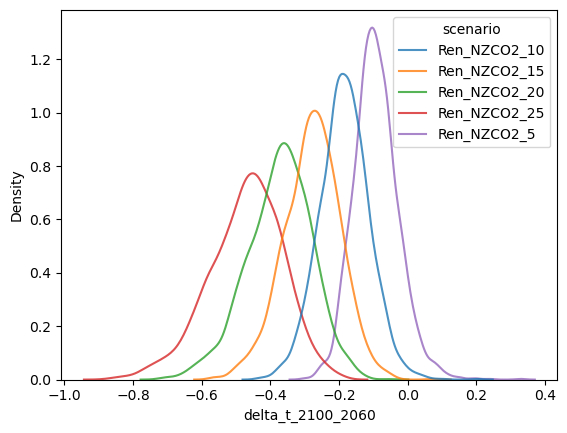

In [23]:
fig,ax=plt.subplots()

colors = [
    'red',
    'blue',
    'orange',
    'green'
]

sns.kdeplot(
    data=compiled_dfs,
    x='delta_t_2100_2060',
    hue='scenario',
    alpha=0.8
)
#ax.axvline(
#    compiled_dfs.loc[:,'delta_t_2100_2050'].quantile(q=0.95),
#    color='red',
#    linestyle='dashed'
#)
#ax.set_xlabel('T(2100) - T(2050)')

In [24]:
compiled_dfs

delta_t_2050_2015  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year run_id                      
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        0                0.370567   
                                                                                                                                                  1                0.139291   
                                                                                                                                                  2                0.122223   
                                                                                                                                                  3                0.608232   
                                                                                                                                                  4                0.545797   
...                                                                                                                                                                     ...   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        2232             0.334809   
                                                                                                                                                  2233             0.394048   
                                                                                                                                                  2234             0.263563   
                                                                                                                                                  2235             0.212893   
                                                                                                                                                  2236             0.298017   

                                                                                                                                                              2050  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year run_id             
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        0       1.555787   
                                                                                                                                                  1       1.220301   
                                                                                                                                                  2       1.022530   
                                                                                                                                                  3       1.789736   
                                                                                                                                                  4       1.566508   
...                                                                                                                                                            ...   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        2232    1.546666   
                                                                                                                                                  2233    1.457985   
                                                                                                                                                  2234    1.523151   
                                                    

Step 10: Create a CO2 emissions variable. We will use this to get the net-negative emissions estimate.

In [25]:
df_emissions_pyam = (
    df_final
    .to_iamdataframe()
    .swap_time_for_year()
)

In [26]:
df_co2 = (
    df_emissions_pyam.aggregate(
        variable='Emissions|CO2',
        components=[
            'Emissions|CO2|MAGICC AFOLU',
            'Emissions|CO2|MAGICC Fossil and Industrial'
        ]
    )
    .timeseries()
)

Step 11: Calculate cumulative net-negative emissions for the two time steps.

In [27]:
scenarios = df_emissions_pyam.scenario
scenarios

['Ren_NZCO2_10', 'Ren_NZCO2_15', 'Ren_NZCO2_20', 'Ren_NZCO2_25', 'Ren_NZCO2_5']

In [28]:
df_co2.index

MultiIndex([('REMIND-MAgPIE 2.1-4.3', 'Ren_NZCO2_10', 'World', ...),
            ('REMIND-MAgPIE 2.1-4.3', 'Ren_NZCO2_15', 'World', ...),
            ('REMIND-MAgPIE 2.1-4.3', 'Ren_NZCO2_20', 'World', ...),
            ('REMIND-MAgPIE 2.1-4.3', 'Ren_NZCO2_25', 'World', ...),
            ('REMIND-MAgPIE 2.1-4.3',  'Ren_NZCO2_5', 'World', ...)],
           names=['model', 'scenario', 'region', 'variable', 'unit'])

In [29]:
compiled_dfs.loc[
    :
]

delta_t_2050_2015  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year run_id                      
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        0                0.370567   
                                                                                                                                                  1                0.139291   
                                                                                                                                                  2                0.122223   
                                                                                                                                                  3                0.608232   
                                                                                                                                                  4                0.545797   
...                                                                                                                                                                     ...   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        2232             0.334809   
                                                                                                                                                  2233             0.394048   
                                                                                                                                                  2234             0.263563   
                                                                                                                                                  2235             0.212893   
                                                                                                                                                  2236             0.298017   

                                                                                                                                                              2050  \
model                 scenario     region variable                       unit climate_model reference_period_end_year reference_period_start_year run_id             
REMIND-MAgPIE 2.1-4.3 Ren_NZCO2_10 World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        0       1.555787   
                                                                                                                                                  1       1.220301   
                                                                                                                                                  2       1.022530   
                                                                                                                                                  3       1.789736   
                                                                                                                                                  4       1.566508   
...                                                                                                                                                            ...   
                      Ren_NZCO2_5  World  Surface Air Temperature Change K    FaIRv1.6.2    1900                      1850                        2232    1.546666   
                                                                                                                                                  2233    1.457985   
                                                                                                                                                  2234    1.523151   
                                                    

In [30]:
for scen in scenarios:
    emissions = (
        df_co2
        .loc[
            pd.IndexSlice[
                :,
                scen,
                :,
                :,
                :
            ],
            :
        ]
    )
    for t_start, t_end in time_frames_of_interest:
        cumulative_emissions = (
            emissions
            .apply(
                lambda x: pyam.cumulative(
                    x,
                    first_year=t_start,
                    last_year=t_end
                ),
                axis=1
            )
            .values[0] / 1e3
        )
        # Assign this to the dataframe
        compiled_dfs.loc[
            pd.IndexSlice[:,scen,:,:,:,:,:,:,:], 
            f'cum_emissions_{t_start}_{t_end}'
        ] = cumulative_emissions

Step 11: Calculate the eTCREdown

In [33]:
compiled_dfs.loc[:,'etcre_down'] = (
    compiled_dfs.loc[:,'delta_t_2100_2060']
    /
    compiled_dfs.loc[:,'cum_emissions_2060_2100']
)

Step 12: Calculate the eTCREup

In [34]:
compiled_dfs.loc[:,'etcre_up'] = (
    compiled_dfs.loc[:,'delta_t_2050_2015']
    /
    compiled_dfs.loc[:,'cum_emissions_2015_2050']
)

Step 13: Write the dataframes out for further assessment.

In [35]:
temp_rebased.to_csv(
        'processed_data/205_temperatures.csv'
)

In [36]:
compiled_dfs.to_csv(
        'processed_data/205_metrics.csv'
)